![20220719094116](https://cdn.jsdelivr.net/gh/xihuishawpy/PicBad@main/blogs/pictures/20220719094116.png)

k-fold CV:

![20220719094414](https://cdn.jsdelivr.net/gh/xihuishawpy/PicBad@main/blogs/pictures/20220719094414.png)

In [13]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

lb = load_boston()
X = pd.DataFrame(lb.data,columns=lb.feature_names)
y = lb.target

X_train , X_test, y_train ,y_test = train_test_split(X,y,random_state=2022,test_size=0.2)


In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
scores = cross_val_score(lr,X,y,scoring='r2',cv=5)
scores

array([ 0.63919994,  0.71386698,  0.58702344,  0.07923081, -0.25294154])

## CV迭代器

![20220719102631](https://cdn.jsdelivr.net/gh/xihuishawpy/PicBad@main/blogs/pictures/20220719102631.png)

In [62]:
# K fold

import numpy as np
from sklearn.model_selection import KFold

X = np.arange(10)
kf = KFold(n_splits=10)
for train, test in kf.split(X):
    print(f"{train} {test}")

[1 2 3 4 5 6 7 8 9] [0]
[0 2 3 4 5 6 7 8 9] [1]
[0 1 3 4 5 6 7 8 9] [2]
[0 1 2 4 5 6 7 8 9] [3]
[0 1 2 3 5 6 7 8 9] [4]
[0 1 2 3 4 6 7 8 9] [5]
[0 1 2 3 4 5 7 8 9] [6]
[0 1 2 3 4 5 6 8 9] [7]
[0 1 2 3 4 5 6 7 9] [8]
[0 1 2 3 4 5 6 7 8] [9]


In [39]:
# Repeated K-Fold 重复K-Foldn次

import numpy as np
from sklearn.model_selection import RepeatedKFold

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])

# 2次 k-fold
rkf = RepeatedKFold(n_splits=4, n_repeats=2, random_state=2022)
for train, test in rkf.split(X):
    print(f"{train} {test}")

[0 1 3] [2]
[0 1 2] [3]
[1 2 3] [0]
[0 2 3] [1]
[0 1 2] [3]
[0 1 3] [2]
[0 2 3] [1]
[1 2 3] [0]


![20220719102650](https://cdn.jsdelivr.net/gh/xihuishawpy/PicBad@main/blogs/pictures/20220719102650.png)

ShuffleSplit 验证集可能会有重复

In [49]:
# 先shuffle数据集，再划分

from sklearn.model_selection import ShuffleSplit

X = np.arange(10)
ss = ShuffleSplit(n_splits=10, random_state=0)

for train_index, test_index in ss.split(X):
    print(f"{train_index} {test_index}")

[8 4 9 1 6 7 3 0 5] [2]
[5 1 2 9 8 0 6 7 4] [3]
[3 8 4 5 1 0 6 9 7] [2]
[1 9 2 7 5 8 0 3 4] [6]
[2 7 4 1 0 6 8 9 3] [5]
[8 9 5 2 6 3 7 4 0] [1]
[2 1 7 8 6 5 4 9 0] [3]
[9 2 3 5 6 7 1 8 4] [0]
[8 9 1 4 5 3 6 0 2] [7]
[2 5 0 8 3 7 9 6 4] [1]


In [55]:
# 基于类标签的分层划分
# 当负面样本可能比正面样本多几倍。
# 建议使用StratifiedKFold和StratifiedShuffleSplit中实现的分层抽样，以确保在每个训练和验证集中大致保持相对的类别频率

from sklearn.model_selection import StratifiedKFold, KFold
import numpy as np

X, y = np.ones((50, 1)), np.hstack(([0] * 45, [1] * 5))

print('-----分层kfold----------------')
skf = StratifiedKFold(n_splits=3)
for train, test in skf.split(X, y):
    print(f'train -  {np.bincount(y[train])}   |   test -  {np.bincount(y[test])}')


print('-----kfold--------------------')
kf = KFold(n_splits=3)
for train, test in kf.split(X, y):
    print(f'train -  {np.bincount(y[train])}   |   test -  {np.bincount(y[test])}')

-----分层kfold----------------
train -  [30  3]   |   test -  [15  2]
train -  [30  3]   |   test -  [15  2]
train -  [30  4]   |   test -  [15  1]
-----kfold--------------------
train -  [28  5]   |   test -  [17]
train -  [28  5]   |   test -  [17]
train -  [34]   |   test -  [11  5]


![20220719103900](https://cdn.jsdelivr.net/gh/xihuishawpy/PicBad@main/blogs/pictures/20220719103900.png)

In [60]:
# 基于时间序列的划分

from sklearn.model_selection import TimeSeriesSplit

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])
tscv = TimeSeriesSplit(n_splits=3)
print(tscv)

for train, test in tscv.split(X):
    print(f"{train} {test}")

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None)
[0 1 2] [3]
[0 1 2 3] [4]
[0 1 2 3 4] [5]


## 排列测试 -- permutation_test_score

其实 特征排序重要性，和这个也有些类似

In [66]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

In [67]:
import numpy as np

n_uncorrelated_features = 20
rng = np.random.RandomState(seed=0)

# 使用与上面数据集相同数量的样本和20个特征
X_rand = rng.normal(size=(X.shape[0], n_uncorrelated_features))
X_rand

array([[ 1.76405235,  0.40015721,  0.97873798, ..., -0.20515826,
         0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ,  0.8644362 , ...,  1.20237985,
        -0.38732682, -0.30230275],
       [-1.04855297, -1.42001794, -1.70627019, ...,  0.3024719 ,
        -0.63432209, -0.36274117],
       ...,
       [ 0.12955452, -1.40596708,  1.17941998, ...,  0.79554955,
        -0.11496177,  0.49585067],
       [-1.32052535,  0.49908428,  0.3062034 , ...,  1.07230065,
        -0.50370944, -0.58701629],
       [-0.37817805,  0.8528891 , -2.14811848, ..., -0.19240421,
        -1.21251574, -0.08059852]])

使用原始数据集计算permutation_test_score，该数据集强烈预测标签，而随机生成的特征和标签，在特征和标签之间应该没有依赖关系。

In [68]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import permutation_test_score

clf = SVC(kernel="linear", random_state=7)
cv = StratifiedKFold(2, shuffle=True, random_state=0)

score_iris, perm_scores_iris, pvalue_iris = permutation_test_score(
    clf, X, y, scoring="accuracy", cv=cv, n_permutations=1000
)

score_rand, perm_scores_rand, pvalue_rand = permutation_test_score(
    clf, X_rand, y, scoring="accuracy", cv=cv, n_permutations=1000
)

红线表示分类器在原始数据上得到的分数。这个分数要比使用互换数据得到的分数好得多，因此P值非常低。这表明，`仅凭偶然性就能获得如此好的分数的可能性很低`。

`证明了数据集包含特征和标签之间的真正依赖性`，分类器能够利用这一点获得良好的结果。

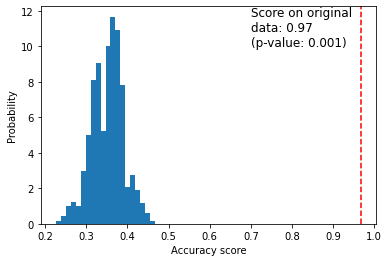

In [69]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.hist(perm_scores_iris, bins=20, density=True)
ax.axvline(score_iris, ls="--", color="r")
score_label = f"Score on original\ndata: {score_iris:.2f}\n(p-value: {pvalue_iris:.3f})"
ax.text(0.7, 10, score_label, fontsize=12)
ax.set_xlabel("Accuracy score")
_ = ax.set_ylabel("Probability")

替换分数与使用原始数据集获得的分数相似，因为替换总是会破坏存在的任何特征标签依赖性。

在这种情况下，`在原始随机数据上获得的分数是非常差的`(一个很大的P值)，证实了`原始数据中没有特征标签依赖性`。

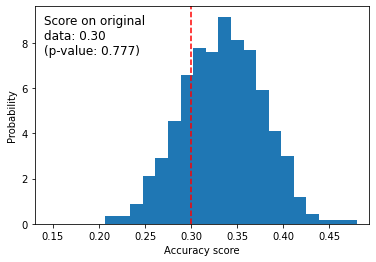

In [70]:
fig, ax = plt.subplots()

ax.hist(perm_scores_rand, bins=20, density=True)
ax.set_xlim(0.13)
ax.axvline(score_rand, ls="--", color="r")
score_label = f"Score on original\ndata: {score_rand:.2f}\n(p-value: {pvalue_rand:.3f})"
ax.text(0.14, 7.5, score_label, fontsize=12)
ax.set_xlabel("Accuracy score")
ax.set_ylabel("Probability")
plt.show()